In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
wrs = pd.read_csv('../Capstone_csv_file/wrs_fuml_salary_19-20')

In [3]:
wrs.dtypes

NAME          object
FUML           int64
FUML_rank    float64
salary         int64
dtype: object

In [4]:
wrs.head()

,NAME,FUML,FUML_rank,salary
0,Josh Reynolds,0,51.0,762005
1,Courtland Sutton,0,51.0,1710480
2,Christian Kirk,0,51.0,1473717
3,Michael Gallup,0,51.0,880995
4,Marquise Brown,0,51.0,2946835


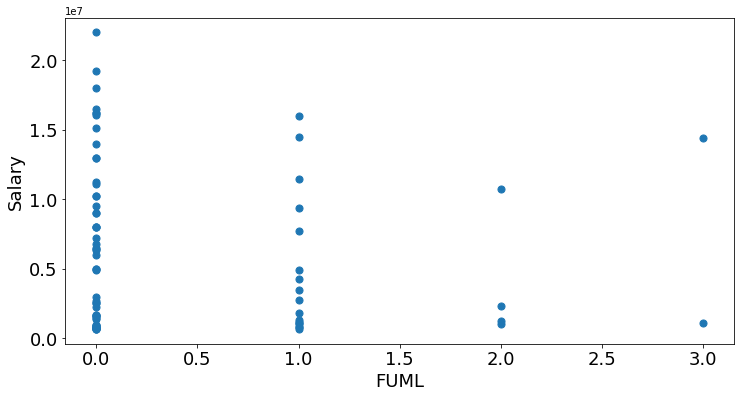

In [5]:
ax = wrs.plot(kind="scatter", x = 'FUML',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('FUML', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(wrs.loc[:, ['FUML', 'salary']])

In [7]:
X.mean(axis = 0)

array([3.50596745e-17, 6.57368896e-17])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[-0.27253351,  1.67460261],
       [-0.57417253, -0.84783164],
       [ 0.83347626, -0.5751026 ],
       [-0.57417253,  0.27609095],
       [ 2.71034132, -0.18976677]])

In [11]:
km.predict(X)

array([1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1,
       1, 3, 1, 1, 1, 3, 3, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 1, 3, 0, 3, 0,
       3, 1, 3, 3, 3, 0, 3, 3, 1, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 4, 4, 4, 4, 4, 4], dtype=int32)

In [12]:
wrs['clusters'] = km.labels_
wrs.head()

,NAME,FUML,FUML_rank,salary,clusters
0,Josh Reynolds,0,51.0,762005,1
1,Courtland Sutton,0,51.0,1710480,1
2,Christian Kirk,0,51.0,1473717,1
3,Michael Gallup,0,51.0,880995,1
4,Marquise Brown,0,51.0,2946835,1


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[2.14285714e-01, 1.58071429e+07],
       [2.77555756e-16, 1.40087617e+06],
       [1.00000000e+00, 2.95850143e+06],
       [1.66533454e-16, 7.81988532e+06],
       [2.33333333e+00, 5.15925283e+06]])

In [14]:
wrs.groupby('clusters')[['FUML', 'salary']].mean()

,FUML,salary
clusters,,
0,0.214286,1.580714e+07
1,0.000000,1.400876e+06
2,1.000000,2.958501e+06
3,0.000000,7.819885e+06
4,2.333333,5.159253e+06


In [15]:
centroids = wrs.groupby('clusters')[['FUML', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

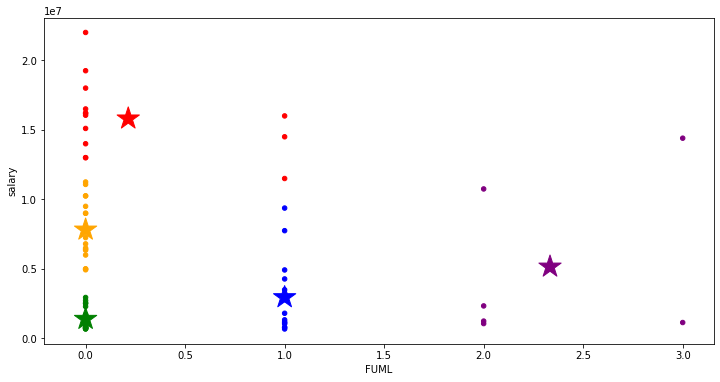

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
wrs['color'] = wrs['clusters'].map(lambda p: colors[p])

ax = wrs.plot(    
    kind = 'scatter', 
    x = 'FUML', y = 'salary',
    figsize = (12,6),
    c = wrs['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'FUML', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

21.22487863965522

In [18]:
silhouette_score(X, km.labels_)

0.6094837325482885